# TDS Week 4 Assignment

# Imports

In [1]:
# ---------- Common ------------
import os
import time
import json
import random
import ast
from datetime import datetime

# ---------- Data Manipulation ------------
import pandas as pd
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)
import numpy as np

# ---------- Data Visualization ------------
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
import seaborn as sns
# custom_params = {"axes.spines.right": False, "axes.spines.top": False}
# sns.set_theme(style="ticks", rc=custom_params)

# ---------- Sklearn ------------
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# ---------- Sklearn Datasets ------------
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import make_blobs
from sklearn.datasets import make_regression
from sklearn.datasets import make_classification
from sklearn.datasets import make_multilabel_classification

# ---------- Sklearn External Datasets ------------
from sklearn.datasets import fetch_openml

# ---------- Scipy ------------
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from scipy import stats

# ---------- Extras ------------
import pickle
# pickle.dump(model, open(filename, 'wb'))
# loaded_model = pickle.load(open(filename, 'rb'))

## Common helper functions

In [2]:
def display_scores(scores):
    print(f'Scores: {scores}')
    print(f'Mean: {scores.mean()}')
    print(f'Std Dev: {scores.std()}')
    return

## Get the Data

### Load Data: On data.gov.in, "Variety-wise Daily Market Prices Data of Goat 2022".

In [3]:
root_path = r"C:\Users\tusha\Jupyter_notebooks\IITM_Term_5\TDS"
os.listdir(root_path)

['.ipynb_checkpoints',
 'Goat_2022.csv',
 'master_currency.csv',
 'rainfall-dataset.csv',
 'TDS Week 2 Assignment.ipynb',
 'TDS Week 3 Assignment.ipynb',
 'TDS Week 4 Assignment.ipynb',
 'TDS_Week_1_Assignment.ipynb']

In [4]:
data_path = os.path.join(root_path, 'master_currency.csv')
df = pd.read_csv(data_path)
print(f"Data Shape: {df.shape}")

Data Shape: (366, 15)


In [5]:
df.head()

,Date,EUR,AUD,BGN,BRL,CAD,CHF,CNY,CZK,DKK,GBP,HKD,HRK,ILS,INR
0,2022-05-18,1.052299,0.702494,0.538039,0.202466,0.780153,1.003512,0.148269,0.042695,0.141403,1.242854,0.127411,0.139655,0.298436,0.012889
1,2022-05-17,1.054074,0.703037,0.538967,0.200321,0.779849,1.008065,0.148677,0.042655,0.141653,1.248907,0.127393,0.140089,0.297876,0.012910
2,2022-05-16,1.042209,0.692185,0.532879,0.197316,0.773575,0.994530,0.147232,0.042177,0.140046,1.225490,0.127390,0.138544,0.293789,0.012854
3,2022-05-15,1.038529,0.689275,0.530983,0.195191,0.768994,1.000000,0.147278,0.041977,0.139561,1.220107,0.127389,0.138099,0.291826,0.012912
4,2022-05-14,1.038529,0.689275,0.530983,0.195191,0.768994,1.000000,0.147278,0.041977,0.139561,1.220107,0.127389,0.138099,0.291826,0.012912


In [6]:
df.isnull().sum(axis=0)

Date    0
EUR     0
AUD     0
BGN     0
BRL     0
CAD     0
CHF     0
CNY     0
CZK     0
DKK     0
GBP     0
HKD     0
HRK     0
ILS     0
INR     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    366 non-null    object 
 1   EUR     366 non-null    float64
 2   AUD     366 non-null    float64
 3   BGN     366 non-null    float64
 4   BRL     366 non-null    float64
 5   CAD     366 non-null    float64
 6   CHF     366 non-null    float64
 7   CNY     366 non-null    float64
 8   CZK     366 non-null    float64
 9   DKK     366 non-null    float64
 10  GBP     366 non-null    float64
 11  HKD     366 non-null    float64
 12  HRK     366 non-null    float64
 13  ILS     366 non-null    float64
 14  INR     366 non-null    float64
dtypes: float64(14), object(1)
memory usage: 43.0+ KB


## Questions

### Q.1] Find the correlation coefficient for the currency pair - "EUR-BRL"?

In [9]:
df[["EUR","BRL"]].corr()

,EUR,BRL
EUR,1.000000,-0.250676
BRL,-0.250676,1.000000


### Q.2] Find the correlation coefficient for the currency pair - "BRL-HRK"?

In [10]:
df[["HRK","BRL"]].corr()

,HRK,BRL
HRK,1.00000,-0.26444
BRL,-0.26444,1.00000


### Q.3] Find the regression slope for the currency pair- "BGN-GBP"?

In [39]:
x_name = "BGN"
y_name = "GBP"

lin_reg = LinearRegression()
lin_reg.fit(df[[x_name]], df[[y_name]])

# y = m*x + b
slope = lin_reg.coef_
intercept = lin_reg.intercept_
print(f"Slope: {slope}\nIntercept: {intercept}")

Slope: [[1.83551563]]
Intercept: [0.27655767]


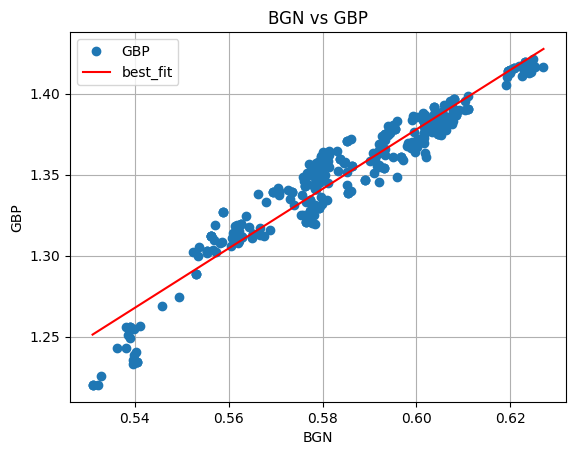

In [40]:
df.plot(x=x_name, y=y_name, style='o')

x = np.array(np.linspace(df[x_name].min(),df[x_name].max(),100)).reshape((100,))
y = ((x*lin_reg.coef_) + lin_reg.intercept_).reshape((100,))
plt.plot(x, y, '-r', label='best_fit')

plt.title(f"{x_name} vs {y_name}")
plt.xlabel(f"{x_name}" )
plt.ylabel(f"{y_name}")
plt.legend(loc='upper left')
plt.grid()
plt.show()

### Q.4] Find the regression slope for the currency pair- "BRL-INR"?

In [41]:
x_name = "BRL"
y_name = "INR"

lin_reg = LinearRegression()
lin_reg.fit(df[[x_name]], df[[y_name]])

# y = m*x + b
slope = lin_reg.coef_
intercept = lin_reg.intercept_
print(f"Slope: {slope}\nIntercept: {intercept}")

Slope: [[-0.00559423]]
Intercept: [0.01443946]


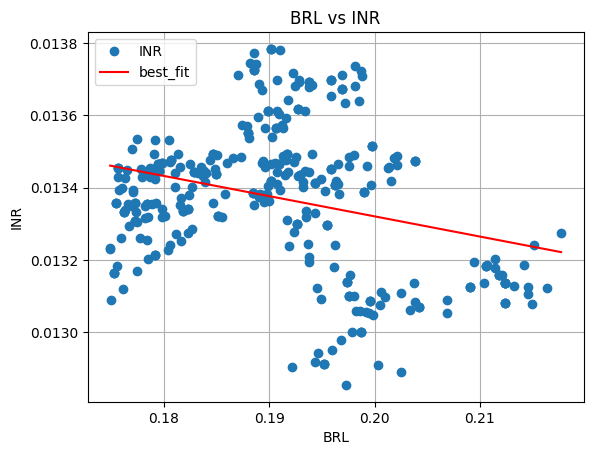

In [42]:
df.plot(x=x_name, y=y_name, style='o')

x = np.array(np.linspace(df[x_name].min(),df[x_name].max(),100)).reshape((100,))
y = ((x*lin_reg.coef_) + lin_reg.intercept_).reshape((100,))
plt.plot(x, y, '-r', label='best_fit')

plt.title(f"{x_name} vs {y_name}")
plt.xlabel(f"{x_name}" )
plt.ylabel(f"{y_name}")
plt.legend(loc='upper left')
plt.grid()
plt.show()

### Q.5] Predict value of currency "BRL" from currency"AUD" where the "AUD" value is the average value of the currency "AUD"?

In [43]:
x_name = "AUD"
y_name = "BRL"

lin_reg = LinearRegression()
lin_reg.fit(df[[x_name]], df[[y_name]])

# y = m*x + b
slope = lin_reg.coef_
intercept = lin_reg.intercept_
print(f"Slope: {slope}\nIntercept: {intercept}")

Slope: [[0.17409651]]
Intercept: [0.06314261]


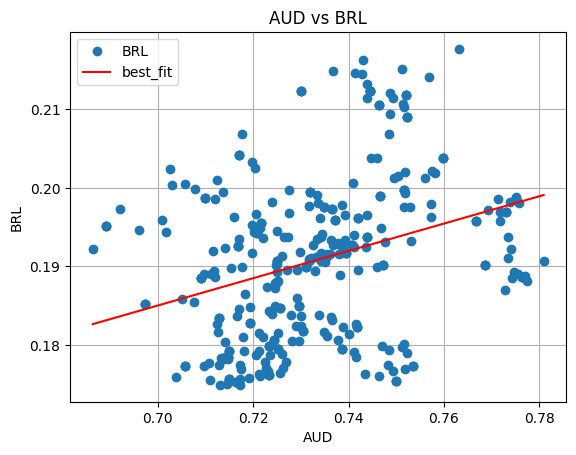

In [44]:
df.plot(x=x_name, y=y_name, style='o')

x = np.array(np.linspace(df[x_name].min(),df[x_name].max(),100)).reshape((100,))
y = ((x*lin_reg.coef_) + lin_reg.intercept_).reshape((100,))
plt.plot(x, y, '-r', label='best_fit')

plt.title(f"{x_name} vs {y_name}")
plt.xlabel(f"{x_name}" )
plt.ylabel(f"{y_name}")
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [52]:
aud_avg = df["AUD"].sum()/len(df["AUD"])
lin_reg.predict(np.array(aud_avg).reshape(-1, 1))

C:\Users\tusha\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[0.19082525]])

### Q.6] Predict value of currency "CZK" from currency"BGN" where the "BGN" value is the average value of the currency "BGN"?

In [53]:
x_name = "BGN"
y_name = "CZK"

lin_reg = LinearRegression()
lin_reg.fit(df[[x_name]], df[[y_name]])

# y = m*x + b
slope = lin_reg.coef_
intercept = lin_reg.intercept_
print(f"Slope: {slope}\nIntercept: {intercept}")

Slope: [[0.05384512]]
Intercept: [0.01403837]


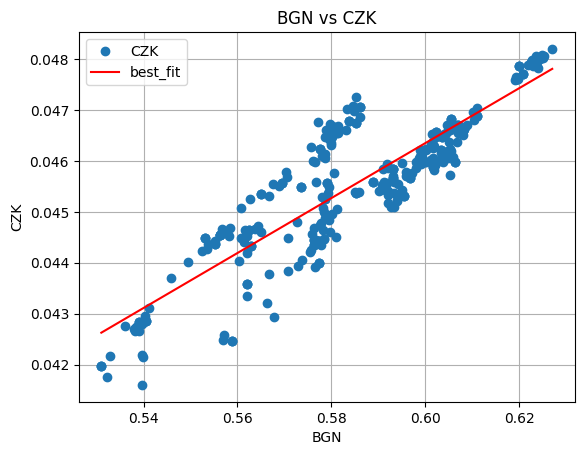

In [54]:
df.plot(x=x_name, y=y_name, style='o')

x = np.array(np.linspace(df[x_name].min(),df[x_name].max(),100)).reshape((100,))
y = ((x*lin_reg.coef_) + lin_reg.intercept_).reshape((100,))
plt.plot(x, y, '-r', label='best_fit')

plt.title(f"{x_name} vs {y_name}")
plt.xlabel(f"{x_name}" )
plt.ylabel(f"{y_name}")
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [55]:
avg = df["BGN"].sum()/len(df["BGN"])
lin_reg.predict(np.array(avg).reshape(-1, 1))

C:\Users\tusha\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[0.04557812]])